$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression
Damian Armijo

## Overview

The overall objective of the assignment is to observe a how a linear model of the data provided by the UCI data set will look. It is also to see how well the trained data will follow with regards to the actual data provided. 

## Method

In [881]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3

# Reading in file via pandas, and putting values into T(target) and X(inputs)
data = pandas.read_csv('energydata_complete.csv')
T = data[['Appliances', 'lights']]
T = np.array(T)
X = data.drop(['date','Appliances', 'lights', 'rv1', 'rv2'], axis=1)
X = np.array(X)



# Getting labels for T and X
names = data.keys()
Xnames = names[3:27]
Tnames = names[0:2]
Xnames = Xnames.insert(0, 'bias')


# Calling the train function. 
model = train(X,T)

# Calling the use function.  
predict = use(model, X)

# Calling the rmse function
error = rmse(predict, T)

# Calling the trainSGD function.
modelSGD = trainSGD(X, T, 0.01, 100)

prediction = predict

# Plotting of prediction data with reference of linear line
plt.figure(figsize=(10,10))
for p in range(2):
    plt.subplot(2, 1, p+1)
    plt.plot(prediction[:, p], T[:, p], 'o')
    plt.xlabel("Predicted appliances")
    plt.ylabel("Predicted light")
    a = max(min(prediction[:, p]), min(T[:, p]))
    b = min(max(prediction[:, p]), max(T[:, p]))
    plt.plot([a, b], [a, b], 'r', linewidth=3)
    
w = model["w"]
Xnames = np.array(Xnames)
for targeti in range(2):
    print('\n Weights for {} target\n'.format(Tnames[targeti]))
    thisw = w[:, targeti]
    sortedOrder = np.argsort(np.abs(thisw))[::-1]
    for wi ,name in zip(thisw[sortedOrder], Xnames[sortedOrder]):
        print('{:8.3f}  {:s}'.format(wi, name))

#plotgraph(X,data)



 Weights for date target

  97.695  bias
  63.936  RH_1
 -58.647  RH_2
 -56.604  T_out
  50.910  T3
  46.661  T6
 -44.540  T9
 -44.521  T2
 -30.857  RH_8
  21.314  Tdewpoint
  19.862  T8
  16.429  RH_3
 -13.590  RH_out
  10.814  RH_6
  -9.426  RH_7
   8.452  RH_4
  -6.227  RH_9
   6.079  T4
   5.219  Windspeed
   2.385  T7
   2.157  RH_5
   2.078  Visibility
   0.910  Press_mm_hg
   0.622  T1
  -0.020  T5

 Weights for Appliances target

   6.618  T4
  -6.296  T9
   4.643  RH_4
   3.802  bias
  -3.242  RH_8
  -2.866  T2
   1.971  T8
  -1.909  RH_2
   1.832  RH_1
   1.632  T6
  -1.260  RH_9
   1.148  RH_out
  -1.101  T_out
   0.929  RH_6
   0.802  T1
  -0.751  RH_7
  -0.706  T7
   0.524  Windspeed
   0.441  RH_5
   0.203  RH_3
   0.131  Visibility
  -0.062  Press_mm_hg
   0.058  Tdewpoint
  -0.032  T3
   0.007  T5


In [860]:
def use(mod, X):
    
    means = mod["means"]
    stds = mod["stds"]
    Xs = (X - means)/stds
    X1 = np.insert(Xs, 0, 1, 1)  # X1 is the standardized inputs with bias
    
    w = mod["w"]
  
    predict = X1 @ w 
    
    return predict
    

In [861]:
# This function returns the error between the predicted data and the target data
def rmse(pred, T):
    
    rmse = np.sqrt(np.mean((pred - T)**2))
  
    return rmse

In [862]:
# This function standardizes the input and returns
# a dictionary containing the means, standard deviations, and weight of X and X
# with respect to T.
def train(X, T):
    means = X.mean(0)
    stds = X.std(0)
    
    Xs = (X - means)/stds
    X1 = np.insert(Xs, 0, 1, 1)    # X1 is the standardized inputs with bias
    
    w = np.linalg.lstsq( X1.T @ X1, X1.T @ T)  # w is the weight created from the standardized inputs
    w = w[0]
    
    model = {"means":means, "stds":stds, "w":w}
    return model


In [847]:
def trainSGD(X, T, learningRate, numberOfIterations):
    means = X.mean(0)
    stds = X.std(0)
    Xs = (X - means)/stds
    X1 = np.insert(Xs, 0, 1, 1)    # X1 is the standardized inputs with bias
    
    nOutputs = T.shape[1]
    nInputs = X1.shape[1]
    
    w = np.zeros((nInputs,nOutputs))    # w is the weight that will be updated linearly as the training goes on

    step = 0
    for iter in range(numberOfIterations):
        for n in range(X.shape[0]):
            step += 1
        
            predicted = X1[n:n+1,:] @ w  
            w += learningRate * X1[n:n+1, :].T * (T[n:n+1, :] - predicted)
    return {"means":means, "stds":stds, "w":w}


In [816]:
# This is a helper function that can be used to standardize the input data from X
def makeStandardize(X):
    means = X.mean(0)
    stds = X.std(0)
    
    def standardize(origX):
        return (origX - means) / stds
    
    def unStandardize(stdX):
        return stds * stdX + means
    
    return (standardize, unStandardize)

In [877]:
# A method that is used to plot out the different graphs of actual energy use vs predicted.
def plotgraph(X, data):
    plt.figure(figsize=(15, 15))
    nrow, ncol = X.shape
    names = data.keys()
    for c in range(ncol):
        plt.tight_layout()
        plt.subplot(5, 5, c+2)
        plt.plot(X[:, c],'o')
        plt.ylabel(names[c+4])    
    

This is the equation that is to be used in order to find the weights. It is also what has been done in python in the above train(X, T) function. Because there are two targets for this assignment the shape of the wieght ends up being (25, 2) with 25 being the amount of input variables with a bias.

$$
\begin{align*}
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

The following equation is used to find the root-mean-square-error(RMSE). This was used in the rmse function and is used to calculate the error of the predictions.
$$
\begin{align*}
rmse &= ({\sqrt{\overline{prediction}-T}})^{2}
\end{align*}
$$

The next function is used in the trainSGD(X, T, learningRate, numberOfIterations) function. This is used to train the data linearly and apply the weights as the data is added. The two for loops at the end of the function is what implements this function.

$$
\begin{align*}
\wv^{(k)} + \eta \xv_n (\tv_n^T - \xv_n^T  \wv) 
\end{align*}
$$


For my project I imported numpy as np and matplotlib.plylot as plt. I also imported the pandas package for reading in the data from a .csv file. 




## Data

The data was supplied from UCI site and includes data about the temperature and humidity in different rooms of an energy efficient house. There was a total of 24 different inputs that were taken into account for this assignment. There were two target variables that were looked at in this data set, appliances and lights, these were measured in Wh and looked at the energy used by the appliances and lights in the house. According the to UCI site the measurements were taken by a "ZigBee wireless sensor network." Luis Candanedo from UMONS is the source for the supplied data. 

## Results

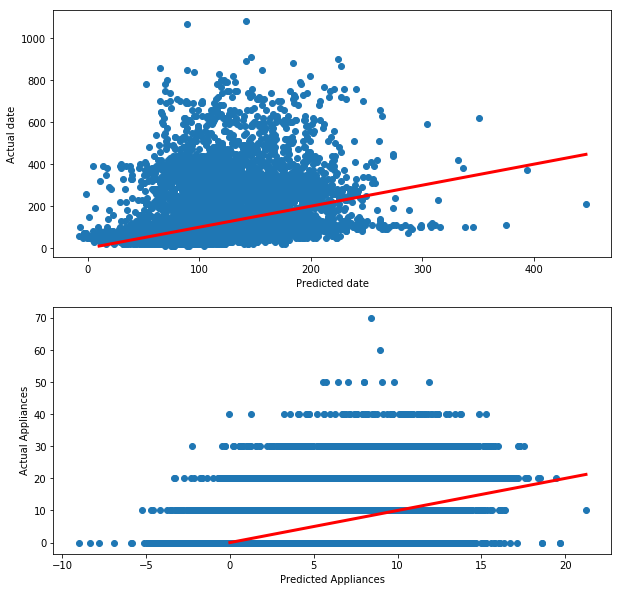

The above graphs shows the accuracy of the training data with a comparison to the 45 degree line that the data should be following. The first graph seems to be somewhat accurate, but with a lot of plots outside of the line. The next graph shows that the training data does not really follow the desired linear fit. I think that removing some input variables may make the trained data more accurate.

Below are the weights created by the target data from the training method, there are some inputs that seem to not be beneficial to helping out the data. Some of the inputs that can be probably excluded are T5, visibillity and press_mm_hg. These inputs seem to be impactful and have low weights for both lights and appliances.

 Weights for Light target

  97.695  bias
  63.936  RH_1
 -58.647  RH_2
 -56.604  T_out
  50.910  T3
  46.661  T6
 -44.540  T9
 -44.521  T2
 -30.857  RH_8
  21.314  Tdewpoint
  19.862  T8
  16.429  RH_3
 -13.590  RH_out
  10.814  RH_6
  -9.426  RH_7
   8.452  RH_4
  -6.227  RH_9
   6.079  T4
   5.219  Windspeed
   2.385  T7
   2.157  RH_5
   2.078  Visibility
   0.910  Press_mm_hg
   0.622  T1
  -0.020  T5

 Weights for Appliances target

   6.618  T4
  -6.296  T9
   4.643  RH_4
   3.802  bias
  -3.242  RH_8
  -2.866  T2
   1.971  T8
  -1.909  RH_2
   1.832  RH_1
   1.632  T6
  -1.260  RH_9
   1.148  RH_out
  -1.101  T_out
   0.929  RH_6
   0.802  T1
  -0.751  RH_7
  -0.706  T7
   0.524  Windspeed
   0.441  RH_5
   0.203  RH_3
   0.131  Visibility
  -0.062  Press_mm_hg
   0.058  Tdewpoint
  -0.032  T3
   0.007  T5

